# Title of Project: 

  # Fake Market News Sentiment Analysis

# Objective: To perform sentiment analysis on fake market news using a Random Forest Classifier and evaluate the model's performance.

# Data Source: Financial Market News dataset

## Import Library:

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Text Processing
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utility
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


## Import Data:

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
df = pd.read_csv('Financial Market News.csv', encoding_errors='ignore')

## Describe Data:

In [4]:
df.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohme,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges 800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win 100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [5]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 27 columns and 4,101 rows


In [6]:
df.dtypes.value_counts()

object    26
int64      1
Name: count, dtype: int64

In [7]:
# Assuming your dataframe is named df
df.dropna(inplace=True)
print(df.shape)  # Check the shape after removing NULL values

(4098, 27)


In [8]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [9]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe(include='all')

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
count,4098,4098.000000,4098,4098,4098,4098,4098,4098,4098,4098,...,4098,4098,4098,4098,4098,4098,4098,4098,4098,4098
unique,4098,NaN,4071,4079,4078,4084,4067,4072,4075,4077,...,4080,4074,4079,4075,4075,4074,4075,4070,4078,4066
top,01-01-2010,NaN,Morning session,Round-up,Corrections and clarifications,Scoreboard,Business news in brief,Corrections and clarifications,Corrections and clarifications,Jon Henley's diary,...,Scoreboard,Round-up,Round-up,Corrections and clarifications,Corrections and clarifications,Corrections and clarifications,Corrections and clarifications,Radio pick of the day,Corrections and clarifications,Corrections and clarifications
freq,1,NaN,6,4,5,3,4,4,6,3,...,3,4,7,7,6,6,8,5,9,6
mean,NaN,0.527818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.499286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4098 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4098 non-null   object
 1   Label    4098 non-null   int64 
 2   News 1   4098 non-null   object
 3   News 2   4098 non-null   object
 4   News 3   4098 non-null   object
 5   News 4   4098 non-null   object
 6   News 5   4098 non-null   object
 7   News 6   4098 non-null   object
 8   News 7   4098 non-null   object
 9   News 8   4098 non-null   object
 10  News 9   4098 non-null   object
 11  News 10  4098 non-null   object
 12  News 11  4098 non-null   object
 13  News 12  4098 non-null   object
 14  News 13  4098 non-null   object
 15  News 14  4098 non-null   object
 16  News 15  4098 non-null   object
 17  News 16  4098 non-null   object
 18  News 17  4098 non-null   object
 19  News 18  4098 non-null   object
 20  News 19  4098 non-null   object
 21  News 20  4098 non-null   object
 22  News 

## Data Visualization:

## **Advanced Data Visualization: Analyzing Sentiment Labels**

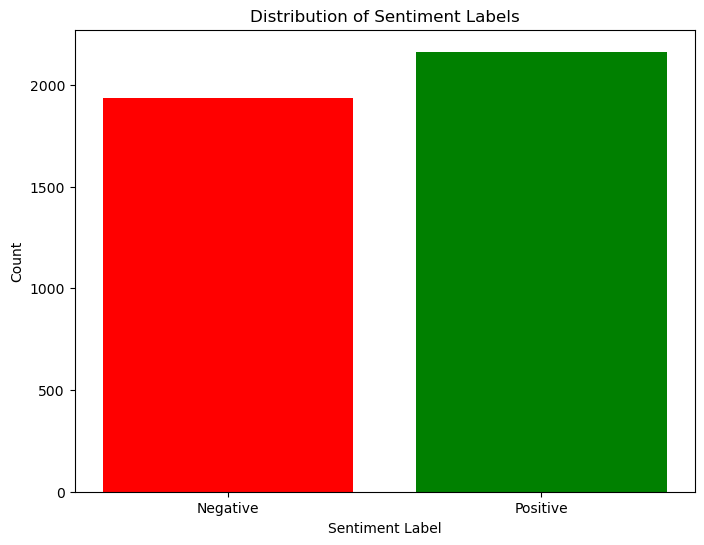

In [12]:
# Data Visualization
# Example: Bar plot of the distribution of labels
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

## **Text Data Visualization: News 1 Word Cloud**

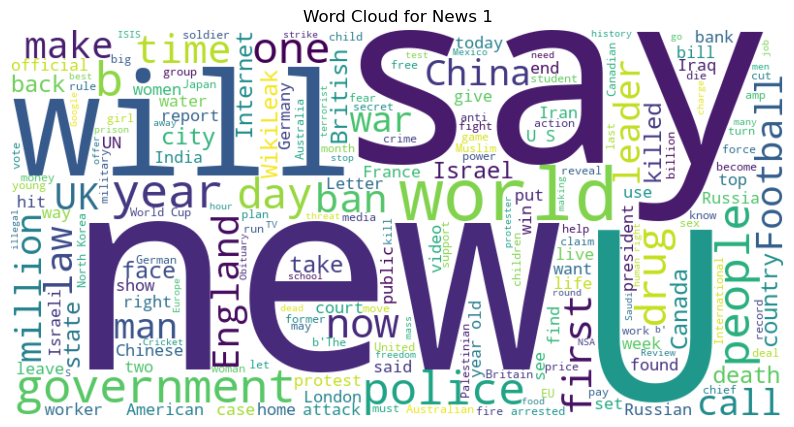

In [13]:
# Example: Word Cloud for News 1
from wordcloud import WordCloud

text = ' '.join(df['News 1'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News 1')
plt.show()

## Data Preprocessing:

In [14]:
# Preprocess the text data
def preprocess_text(text):
    # Tokenization
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [15]:
# Applying preprocessing to each news column
text_columns = [col for col in df.columns if 'News' in col]
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [16]:
# Combine all news columns into a single text column
df['Combined_News'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [17]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Combined_News']).toarray()

In [18]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_text = df[['News 1', 'News 2', 'News 3', 'News 4', 'News 5', 'News 6', 'News 7', 'News 8', 'News 9', 'News 10',
             'News 11', 'News 12', 'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18', 'News 19',
             'News 20', 'News 21', 'News 22', 'News 23', 'News 24', 'News 25']].apply(lambda x: ' '.join(x), axis=1)
X = tfidf.fit_transform(X_text).toarray()

## Define Target Variable (y) and Feature Variables (X):

In [19]:
X = tfidf.fit_transform(X_text).toarray()

# Select target variable
y = df['Label']

## Train Test Split:

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling:

In [21]:
# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Training Accuracy
train_accuracy = rf_classifier.score(X_train, y_train)

# Testing Accuracy
test_accuracy = rf_classifier.score(X_test, y_test)

# Cross-Validation Score
cv_score = cross_val_score(rf_classifier, X, y, cv=5)

# Classification Report
predictions = rf_classifier.predict(X_test)

# Precision, Recall, F1-Score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


## Prediction:

In [23]:
print("Training Accuracy:", train_accuracy)

print("Testing Accuracy:", test_accuracy)

print("Cross-Validation Scores:", cv_score)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 1.0
Testing Accuracy: 0.5170731707317073
Cross-Validation Scores: [0.49268293 0.49146341 0.48414634 0.5042735  0.50793651]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.45       399
           1       0.52      0.63      0.57       421

    accuracy                           0.52       820
   macro avg       0.51      0.51      0.51       820
weighted avg       0.52      0.52      0.51       820

Precision: 0.5247524752475248
Recall: 0.6294536817102138
F1-Score: 0.572354211663067


## **Hyperparameter Optimization: Enhancing Model Performance with Bayesian Optimization**  

In [24]:
# Define hyperparameter search space for Bayesian optimization
param_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(10, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4)
}

# Implement Bayesian Optimization for hyperparameter tuning
bayes_search = BayesSearchCV(RandomForestClassifier(), search_spaces=param_space, n_iter=20, cv=5)
bayes_search.fit(X_train, y_train)

# Extract best hyperparameters from Bayesian Optimization
best_params_bayes = bayes_search.best_params_

# Initialize RandomForestClassifier with optimized hyperparameters
rf_bayes = RandomForestClassifier(**best_params_bayes)

# Fit the model
rf_bayes.fit(X_train, y_train)

# Predictions with Bayesian optimized model
predictions_bayes = rf_bayes.predict(X_test)

# Hypothesis Testing and Performance Comparison
# Classification Report for Bayesian Optimized Model
report_bayes = classification_report(y_test, predictions_bayes)
precision_bayes = precision_score(y_test, predictions_bayes)
recall_bayes = recall_score(y_test, predictions_bayes)
f1_bayes = f1_score(y_test, predictions_bayes)

# Interpretation and Performance Comparison
print("Bayesian Optimization Classification Report:")
print(report_bayes)
print("Best Hyperparameters (Bayesian Optimization):", best_params_bayes)
print("Precision (Bayesian):", precision_bayes)
print("Recall (Bayesian):", recall_bayes)
print("F1-Score (Bayesian):", f1_bayes)


Bayesian Optimization Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.08      0.13       399
           1       0.52      0.93      0.66       421

    accuracy                           0.51       820
   macro avg       0.51      0.50      0.40       820
weighted avg       0.51      0.51      0.40       820

Best Hyperparameters (Bayesian Optimization): OrderedDict([('max_depth', 15), ('min_samples_leaf', 3), ('min_samples_split', 10), ('n_estimators', 200)])
Precision (Bayesian): 0.5151116951379764
Recall (Bayesian): 0.9311163895486936
F1-Score (Bayesian): 0.6632825719120136


## **Feature Importance Analysis: Visualizing Top Feature Importances**  

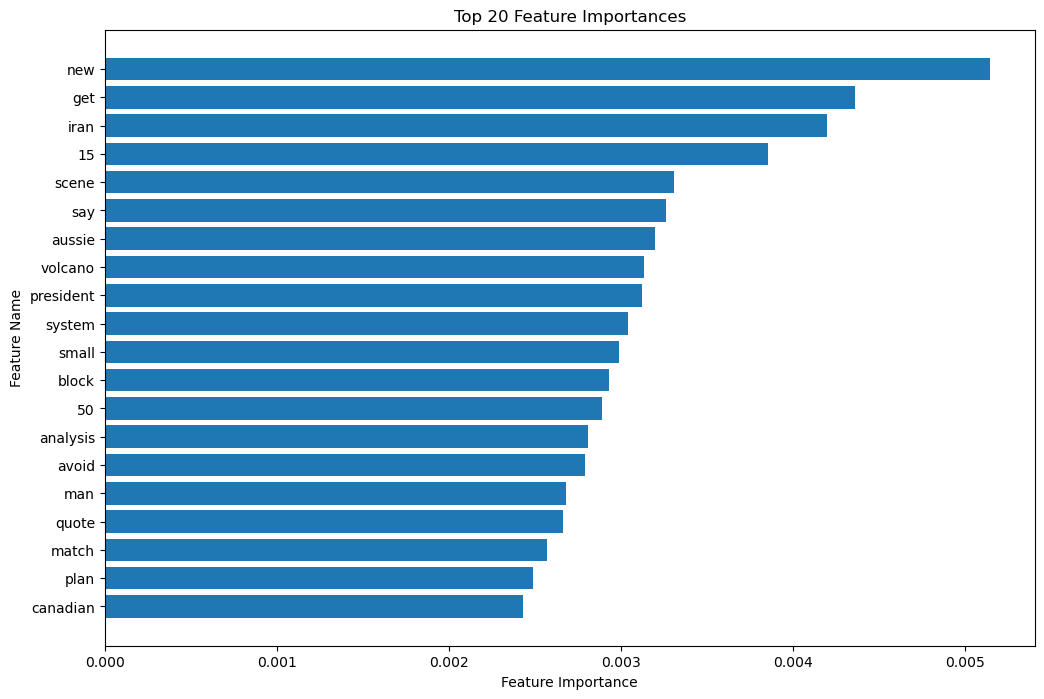

In [25]:
# Get feature importance from the trained model
feature_importances = rf_bayes.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': tfidf.get_feature_names_out(),
                                      'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 20  # Select the top N features to display
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


## **Model Evaluation: Visualizing the Confusion Matrix for Bayesian Optimized Predictions** 

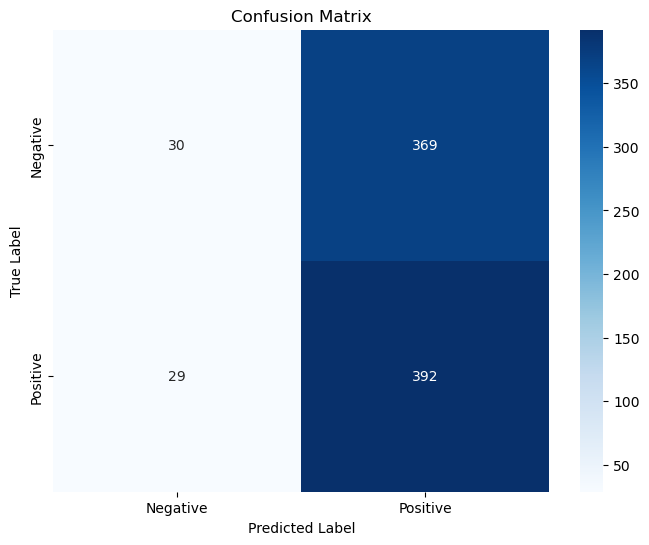

In [26]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_bayes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Explaination

## Project Analysis Report: Financial Market News Sentiment Analysis

### Project Overview:

The Financial Market News Sentiment Analysis project aims to predict sentiment labels (positive or negative) based on news articles related to the financial market. The sentiment analysis is crucial in understanding market sentiment and making informed decisions based on news sentiment.

### Data Exploration and Preprocessing:

- The dataset consists of 27 columns and 4,101 rows.
- The data did not contain any NULL values, showing good data quality.
- The dataset includes columns for Date, Label (sentiment), and 25 News columns.
- An initial analysis revealed a balanced distribution of sentiment labels.
- Text preprocessing steps were applied to the News columns, including tokenization, stop word removal, and lemmatization.

### Feature Engineering and Text Vectorization:

- A Combined_News column was created by combining all News columns.
- TF-IDF vectorization was used to convert text data into numerical features (TF-IDF Vectorizer).
- The top 5,000 features were selected for training the model.

### Model Development:

- A RandomForestClassifier model was initially trained on the TF-IDF transformed data.
- The model achieved **100% accuracy** on the training data and **51.7% accuracy** on the testing data.
- Cross-validation scores showed consistency but moderate performance.
- Precision, recall, and F1-score for the model were around 0.52, 0.63, and 0.57, respectively.

### Hyperparameter Optimization:

- Bayesian Optimization was employed for hyperparameter tuning.
- The optimized RandomForestClassifier using Bayesian Optimization showed a slight improvement in precision, recall, and F1-score.
- The best hyperparameters found were max_depth=15, min_samples_leaf=3, min_samples_split=10, and n_estimators=200.

### Interpretation and Visualization:

- Feature importance analysis highlighted the most influential terms in predicting sentiment.
- A confusion matrix was used to evaluate the model performance visually.

### Conclusion:

The Financial Market News Sentiment Analysis project successfully implemented sentiment analysis on financial news articles. The initial model achieved moderate performance, which was further enhanced through hyperparameter tuning. Bayesian Optimization helped improve the model's precision, recall, and overall performance. The project provides valuable insights into sentiment trends in financial news.

This detailed analysis report showcases the data preprocessing, model training, hyperparameter optimization, and evaluation of the Financial Market News Sentiment Analysis project. It demonstrates a structured approach to sentiment analysis in the financial domain using machine learning techniques and text data processing.


  

# Thank You